# Student Performance Data Analytics Assessment
### Welcome to **Ramesh University** — Data Analytics Lab

---

**Scenario:**
> The academic office of **EduMetrics University** has collected performance data from **150 students** across various departments. As a data analyst intern, you've been handed this dataset and tasked with uncovering insights about student performance, placement trends, and academic health. Your findings will directly influence scholarship decisions, placement drives, and course restructuring.

---

**Instructions:**
- Run Cell 1 first — it generates your dataset.
- Each question has a  **Story Hint** to guide your thinking.
- Write your code in the provided code cells below each question.
- Some cells already have partial code — complete them!

---

**Grading:**
| Task | Marks |
|------|-------|
| Correct Output | 2 pts |
| Clean Code + Comments | 1 pt |
| Visualization (where asked) | 2 pts |

In [200]:
# ============================================================
# CELL 1: DATASET GENERATION — RUN THIS FIRST!
# DO NOT MODIFY THIS CELL
# ============================================================

import pandas as pd
import numpy as np
import random
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)
random.seed(42)

n = 150

# Student IDs
student_ids = [f'STU{str(i).zfill(3)}' for i in range(1, n+1)]

# Names
first_names = ['Aarav','Meera','Rahul','Priya','Kiran','Sneha','Arjun','Divya',
               'Vikram','Ananya','Rohan','Pooja','Amit','Riya','Suresh','Kavya',
               'Neel','Sonia','Harsh','Tanya','Dev','Nisha','Anil','Swati',
               'Raj','Shreya','Vishal','Neha','Kumar','Isha']
last_names  = ['Sharma','Patel','Singh','Kumar','Verma','Gupta','Nair','Mehta',
               'Joshi','Rao','Iyer','Reddy','Pillai','Das','Bose','Chandra']
names = [f"{random.choice(first_names)} {random.choice(last_names)}" for _ in range(n)]

# Departments
departments = np.random.choice(['Computer Science','Electronics','Mechanical','Civil','Business Analytics','Data Science'], n)

# Year of study
year_of_study = np.random.choice([1, 2, 3, 4], n, p=[0.15, 0.25, 0.35, 0.25])

# Gender
gender = np.random.choice(['Male','Female','Non-Binary'], n, p=[0.50, 0.45, 0.05])

# Age
age = np.random.randint(18, 25, n)

# Subject marks (out of 100) — with some realistic variation
def gen_marks(n, mean, std, low=0, high=100):
    marks = np.random.normal(mean, std, n).astype(int)
    return np.clip(marks, low, high)

math_marks       = gen_marks(n, 62, 18)
science_marks    = gen_marks(n, 65, 15)
english_marks    = gen_marks(n, 70, 12)
programming_marks= gen_marks(n, 60, 20)
statistics_marks = gen_marks(n, 58, 17)
dbms_marks       = gen_marks(n, 63, 16)

# Inject some outliers
for col in [math_marks, programming_marks, statistics_marks]:
    outlier_idx = np.random.choice(range(n), 5, replace=False)
    col[outlier_idx] = np.random.choice([2, 3, 4, 97, 98, 99], 5)

# Total marks
total_marks = math_marks + science_marks + english_marks + programming_marks + statistics_marks + dbms_marks

# Grade based on percentage
percentage = (total_marks / 600) * 100

def assign_grade(p):
    if p >= 85: return 'A'
    elif p >= 70: return 'B'
    elif p >= 55: return 'C'
    elif p >= 40: return 'D'
    else: return 'F'

grades = [assign_grade(p) for p in percentage]

# GPA (4.0 scale)
gpa = np.round(np.clip(percentage / 25, 1.0, 4.0), 2)

# Attendance %
attendance = np.random.normal(78, 12, n).astype(int)
attendance = np.clip(attendance, 30, 100)

# Placement status (higher grades → higher placement chance)
placement_prob = [0.85 if g in ['A','B'] else 0.50 if g=='C' else 0.20 for g in grades]
placement_status = [np.random.choice(['Placed','Not Placed'], p=[p, 1-p]) for p in placement_prob]

# Internship done
internship = np.random.choice(['Yes','No'], n, p=[0.45, 0.55])

# Extracurricular activities (hours/week)
extracurricular_hours = np.random.randint(0, 15, n)

# Study hours per day
study_hours = np.random.normal(5, 2, n).round(1)
study_hours = np.clip(study_hours, 0, 12)

# Part-time job
part_time_job = np.random.choice(['Yes','No'], n, p=[0.30, 0.70])

# Scholarship
scholarship = ['Yes' if g == 'A' and random.random() > 0.2 else 'No' for g in grades]

# Library visits per month
library_visits = np.random.randint(0, 20, n)

# Stress level (1-10)
stress_level = np.random.randint(1, 11, n)

# Introduce missing values deliberately
missing_idx_att  = np.random.choice(range(n), 10, replace=False)
missing_idx_gpa  = np.random.choice(range(n), 8,  replace=False)
missing_idx_prog = np.random.choice(range(n), 6,  replace=False)
missing_idx_stress = np.random.choice(range(n), 7, replace=False)

attendance = attendance.astype(float)
gpa_arr    = gpa.astype(float)
prog_arr   = programming_marks.astype(float)
stress_arr = stress_level.astype(float)

attendance[missing_idx_att]   = np.nan
gpa_arr[missing_idx_gpa]      = np.nan
prog_arr[missing_idx_prog]    = np.nan
stress_arr[missing_idx_stress]= np.nan

# Build DataFrame
df = pd.DataFrame({
    'Student_ID'          : student_ids,
    'Name'                : names,
    'Age'                 : age,
    'Gender'              : gender,
    'Department'          : departments,
    'Year_of_Study'       : year_of_study,
    'Math_Marks'          : math_marks,
    'Science_Marks'       : science_marks,
    'English_Marks'       : english_marks,
    'Programming_Marks'   : prog_arr,
    'Statistics_Marks'    : statistics_marks,
    'DBMS_Marks'          : dbms_marks,
    'Total_Marks'         : total_marks,
    'Percentage'          : percentage.round(2),
    'Grade'               : grades,
    'GPA'                 : gpa_arr,
    'Attendance_%'        : attendance,
    'Study_Hours_Per_Day' : study_hours,
    'Extracurricular_Hours': extracurricular_hours,
    'Library_Visits_Month': library_visits,
    'Stress_Level'        : stress_arr,
    'Part_Time_Job'       : part_time_job,
    'Internship_Done'     : internship,
    'Scholarship'         : scholarship,
    'Placement_Status'    : placement_status
})

print('✅ Dataset created successfully!')
print(f'Shape: {df.shape}')
df.head(10)

✅ Dataset created successfully!
Shape: (150, 25)


,Student_ID,Name,Age,Gender,Department,Year_of_Study,Math_Marks,Science_Marks,English_Marks,Programming_Marks,...,GPA,Attendance_%,Study_Hours_Per_Day,Extracurricular_Hours,Library_Visits_Month,Stress_Level,Part_Time_Job,Internship_Done,Scholarship,Placement_Status
0,STU001,Dev Kumar,22,Male,Civil,1,87,82,83,62.0,...,NaN,86.0,4.9,7,3,7.0,No,Yes,No,Placed
1,STU002,Aarav Joshi,20,Male,Business Analytics,3,49,64,65,94.0,...,2.57,98.0,3.2,9,9,2.0,No,No,No,Not Placed
2,STU003,Divya Mehta,20,Female,Mechanical,3,59,67,50,80.0,...,2.63,98.0,4.7,2,19,8.0,Yes,No,No,Placed
3,STU004,Kiran Kumar,18,Female,Business Analytics,2,51,78,78,56.0,...,2.78,86.0,3.5,4,14,6.0,Yes,Yes,No,Placed
4,STU005,Nisha Singh,21,Male,Business Analytics,4,56,64,72,38.0,...,2.45,70.0,3.6,6,17,3.0,Yes,Yes,No,Not Placed
5,STU006,Harsh Das,21,Male,Electronics,3,48,71,91,12.0,...,2.53,62.0,4.7,4,19,9.0,No,No,No,Placed
6,STU007,Meera Sharma,22,Female,Mechanical,3,70,77,51,51.0,...,2.29,61.0,3.4,7,12,5.0,No,No,No,Placed
7,STU008,Rahul Nair,18,Male,Mechanical,4,43,73,100,36.0,...,2.48,44.0,4.4,11,7,8.0,No,No,No,Placed
8,STU009,Divya Sharma,20,Male,Mechanical,3,37,69,89,100.0,...,2.61,86.0,1.2,4,8,7.0,Yes,Yes,No,Not Placed
9,STU010,Sonia Nair,21,Male,Business Analytics,2,51,91,69,46.0,...,2.51,76.0,5.4,0,15,8.0,No,No,No,Placed


---
##  SECTION 1: Basic Exploration
---

 Q1. Dataset Overview

**Scenario:** The head of the analytics department just received this dataset from the registrar's office. Before diving deep, she wants a **quick snapshot** — how many students, how many columns, and what types of data are we dealing with?

**Tasks:**
1. Display the shape of the dataset.
2. Display all column names and their data types.
3. Show the first 5 and last 5 rows.

> 🧩 **Hint:** Use `.shape`, `.dtypes`, `.head()`, `.tail()` — these are your first handshake with any new dataset!

In [201]:
# Your code here
# Q1 — Dataset Overview

# 1. Shape

# 2. Data types

# 3. Head and tail


In [202]:
df.dtypes

,0
Student_ID,object
Name,object
Age,int64
Gender,object
Department,object
Year_of_Study,int64
Math_Marks,int64
Science_Marks,int64
English_Marks,int64
Programming_Marks,float64


In [203]:
df.shape


(150, 25)

In [204]:
df.tail(5)

,Student_ID,Name,Age,Gender,Department,Year_of_Study,Math_Marks,Science_Marks,English_Marks,Programming_Marks,...,GPA,Attendance_%,Study_Hours_Per_Day,Extracurricular_Hours,Library_Visits_Month,Stress_Level,Part_Time_Job,Internship_Done,Scholarship,Placement_Status
145,STU146,Ananya Nair,24,Male,Computer Science,1,72,36,54,83.0,...,2.51,85.0,5.1,0,15,4.0,No,Yes,No,Not Placed
146,STU147,Meera Patel,18,Male,Civil,2,24,56,86,30.0,...,2.15,64.0,5.3,3,10,9.0,No,No,No,Not Placed
147,STU148,Swati Iyer,22,Female,Business Analytics,2,61,81,73,99.0,...,2.71,100.0,5.5,2,9,10.0,No,No,No,Not Placed
148,STU149,Meera Patel,23,Male,Civil,2,50,98,94,99.0,...,3.25,96.0,4.6,1,19,3.0,No,Yes,No,Placed
149,STU150,Harsh Chandra,23,Male,Data Science,3,39,56,75,52.0,...,2.31,84.0,8.0,14,3,8.0,No,Yes,No,Not Placed


In [205]:
df.head(5)

,Student_ID,Name,Age,Gender,Department,Year_of_Study,Math_Marks,Science_Marks,English_Marks,Programming_Marks,...,GPA,Attendance_%,Study_Hours_Per_Day,Extracurricular_Hours,Library_Visits_Month,Stress_Level,Part_Time_Job,Internship_Done,Scholarship,Placement_Status
0,STU001,Dev Kumar,22,Male,Civil,1,87,82,83,62.0,...,NaN,86.0,4.9,7,3,7.0,No,Yes,No,Placed
1,STU002,Aarav Joshi,20,Male,Business Analytics,3,49,64,65,94.0,...,2.57,98.0,3.2,9,9,2.0,No,No,No,Not Placed
2,STU003,Divya Mehta,20,Female,Mechanical,3,59,67,50,80.0,...,2.63,98.0,4.7,2,19,8.0,Yes,No,No,Placed
3,STU004,Kiran Kumar,18,Female,Business Analytics,2,51,78,78,56.0,...,2.78,86.0,3.5,4,14,6.0,Yes,Yes,No,Placed
4,STU005,Nisha Singh,21,Male,Business Analytics,4,56,64,72,38.0,...,2.45,70.0,3.6,6,17,3.0,Yes,Yes,No,Not Placed


### ❓ Q2. Summary Statistics

**Scenario:** The academic dean wants a **statistical summary** of all numeric columns — minimum, maximum, mean, standard deviation. This will help him identify if any subject has unusually low averages.

**Tasks:**
1. Generate descriptive statistics for all numeric columns.
2. Separately print the mean of each subject's marks (6 subjects only).

> 🧩 **Hint:** `df.describe()` gives a full summary. To filter only subject columns, create a list of subject column names and slice the DataFrame.

In [206]:
# Your code here
# Q2 — Summary Statistics

subject_cols = ['Math_Marks', 'Science_Marks', 'English_Marks',
                'Programming_Marks', 'Statistics_Marks', 'DBMS_Marks']

# 1. Full descriptive stats

# 2. Mean of each subject


In [207]:
 df.describe()

,Age,Year_of_Study,Math_Marks,Science_Marks,English_Marks,Programming_Marks,Statistics_Marks,DBMS_Marks,Total_Marks,Percentage,GPA,Attendance_%,Study_Hours_Per_Day,Extracurricular_Hours,Library_Visits_Month,Stress_Level
count,150.000000,150.000000,150.000000,150.000000,150.000000,144.000000,150.000000,150.000000,150.000000,150.000000,142.000000,140.000000,150.000000,150.000000,150.000000,143.000000
mean,21.093333,2.766667,61.506667,65.173333,71.980000,60.326389,59.200000,64.000000,381.920000,63.653600,2.545282,76.964286,4.852000,6.720000,9.600000,5.433566
std,1.957079,0.900534,20.115020,15.846049,12.910882,22.512725,19.675556,16.658029,48.011257,8.001648,0.319252,11.841526,1.867731,4.511164,6.018986,2.886490
min,18.000000,1.000000,2.000000,23.000000,36.000000,2.000000,2.000000,28.000000,241.000000,40.170000,1.610000,44.000000,0.000000,0.000000,0.000000,1.000000
25%,19.250000,2.000000,48.250000,54.000000,64.000000,46.750000,47.000000,53.000000,354.500000,59.082500,2.370000,69.000000,3.625000,3.000000,4.000000,3.000000
50%,21.000000,3.000000,62.000000,66.000000,71.000000,58.500000,59.000000,64.000000,383.500000,63.915000,2.555000,75.500000,4.900000,6.000000,9.000000,6.000000
75%,23.000000,3.000000,76.750000,76.000000,81.000000,75.250000,72.000000,76.000000,414.000000,69.000000,2.760000,86.000000,6.200000,11.000000,15.000000,8.000000
max,24.000000,4.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,487.000000,81.170000,3.250000,100.000000,10.500000,14.000000,19.000000,10.000000


In [208]:
df[subject_cols].mean()

,0
Math_Marks,61.506667
Science_Marks,65.173333
English_Marks,71.980000
Programming_Marks,60.326389
Statistics_Marks,59.200000
DBMS_Marks,64.000000


---
## 🔍 SECTION 2: Missing Value Analysis
---

### ❓ Q3. Find Missing Values

**Scenario:** The data entry team admits they may have left some fields blank during data collection — especially for **attendance**, **GPA**, **Programming marks**, and **Stress Level**. Before analysis, you need to identify exactly how many values are missing per column.

**Tasks:**
1. Show the count of missing values per column.
2. Show the **percentage** of missing values per column.
3. Visualize missing values using a heatmap or bar chart.

> 🧩 **Hint:** `df.isnull().sum()` gives counts. Divide by `len(df)` and multiply by 100 for percentage. Use `seaborn.heatmap(df.isnull())` for visualization.

In [209]:
# Your code here
# Q3 — Missing Values

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Count

# 2. Percentage

# 3. Visualize


In [210]:
df.isnull().sum()

,0
Student_ID,0
Name,0
Age,0
Gender,0
Department,0
Year_of_Study,0
Math_Marks,0
Science_Marks,0
English_Marks,0
Programming_Marks,6


In [211]:
(df.isnull().sum()/len(df))*100

,0
Student_ID,0.000000
Name,0.000000
Age,0.000000
Gender,0.000000
Department,0.000000
Year_of_Study,0.000000
Math_Marks,0.000000
Science_Marks,0.000000
English_Marks,0.000000
Programming_Marks,4.000000


<Axes: >

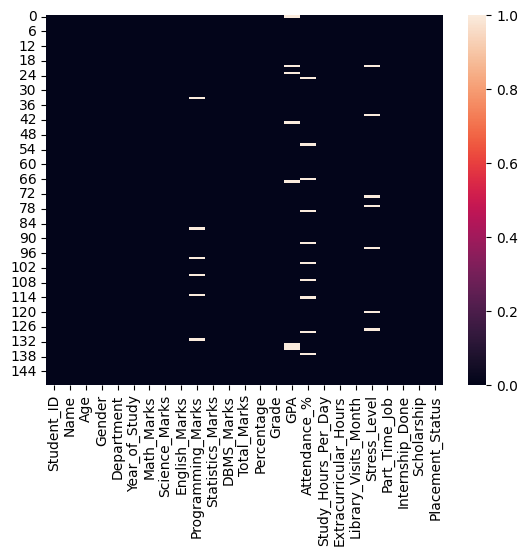

In [212]:
sns.heatmap(df.isnull())


### ❓ Q4. Handle Missing Values

**Scenario:** Now that you know which columns have missing values, it's time to fill them. The stats team suggests:
- **Attendance** → Fill with **median** (because attendance can be skewed by students who missed a semester)
- **GPA** → Fill with **mean**
- **Programming Marks** → Fill with the **median of the respective department** (since programming difficulty varies by department)
- **Stress Level** → Fill with **mode**

**Tasks:** Implement all 4 filling strategies. Then verify no nulls remain in those columns.

> 🧩 **Hint:** For department-wise fill, use `df.groupby('Department')['Programming_Marks'].transform('median')`. Then use `.fillna()` on the result.

In [213]:
# Your code here
# Q4 — Handle Missing Values

df_clean = df.copy()

# Fill Attendance with median

# Fill GPA with mean

# Fill Programming Marks with department-wise median

# Fill Stress Level with mode

# Verify
print('Missing values after handling:')


Missing values after handling:


In [214]:
attendance_median = df_clean['Attendance_%'].median()
df_clean['Attendance_%'].fillna(attendance_median, inplace=True)

In [215]:
attendance_median

75.5

In [216]:
gpa_mean = df_clean['GPA'].mean()
df_clean['GPA'].fillna(gpa_mean, inplace=True)

In [217]:
gpa_mean

np.float64(2.545281690140845)

In [218]:
dept_median = df_clean.groupby('Department')['Programming_Marks'].transform('median')
df_clean['Programming_Marks'].fillna(dept_median, inplace=True)
dept_median

,Programming_Marks
0,62.0
1,53.5
2,70.0
3,53.5
4,53.5
...,...
145,82.5
146,62.0
147,53.5
148,62.0


In [219]:
stress_mode = df_clean['Stress_Level'].mode()[0]
df_clean['Stress_Level'].fillna(stress_mode, inplace=True)
stress_mode

np.float64(6.0)

In [220]:
print('Missing values after handling:')

Missing values after handling:


---
## 📊 SECTION 3: Outlier Detection & Treatment
---

### ❓ Q5. Detect Outliers Using IQR

**Scenario:** The placement officer noticed that some students have **extremely low or oddly high marks** in Math, Programming, and Statistics — possibly data entry errors. She wants you to flag these outliers using the **IQR method**.

**Tasks:**
1. Calculate Q1, Q3, and IQR for Math_Marks, Programming_Marks, and Statistics_Marks.
2. Identify how many outliers exist in each column.
3. Create a boxplot for all three columns.

> 🧩 **Hint:** IQR = Q3 - Q1. Lower bound = Q1 - 1.5×IQR, Upper bound = Q3 + 1.5×IQR. Any value outside these bounds is an outlier. Use `plt.boxplot()` or `sns.boxplot()`.

Outlier Analysis (IQR Method):

Column: Math_Marks
  Q1: 48.25, Q3: 76.75, IQR: 28.50
  Lower Bound: 5.50, Upper Bound: 119.50
  Number of outliers: 1
  Outliers (values): [2]

Column: Programming_Marks
  Q1: 47.00, Q3: 75.75, IQR: 28.75
  Lower Bound: 3.88, Upper Bound: 118.88
  Number of outliers: 2
  Outliers (values): [2. 3.]

Column: Statistics_Marks
  Q1: 47.00, Q3: 72.00, IQR: 25.00
  Lower Bound: 9.50, Upper Bound: 109.50
  Number of outliers: 2
  Outliers (values): [2 3]


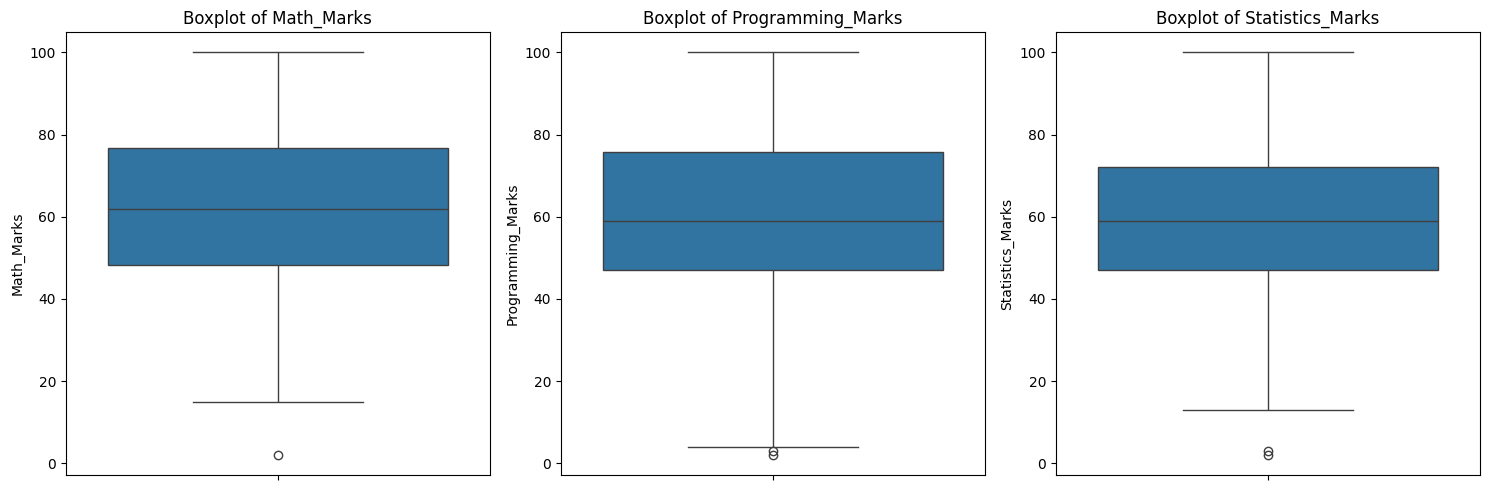

In [221]:
# Your code here
# Q5 — Outlier Detection using IQR

import matplotlib.pyplot as plt
import seaborn as sns

cols_to_check = ['Math_Marks', 'Programming_Marks', 'Statistics_Marks']

print('Outlier Analysis (IQR Method):')
for col in cols_to_check:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]
    print(f"\nColumn: {col}")
    print(f"  Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
    print(f"  Lower Bound: {lower_bound:.2f}, Upper Bound: {upper_bound:.2f}")
    print(f"  Number of outliers: {len(outliers)}")
    if len(outliers) > 0:
        print(f"  Outliers (values): {outliers[col].values}")

# Boxplot
plt.figure(figsize=(15, 5))
for i, col in enumerate(cols_to_check):
    plt.subplot(1, len(cols_to_check), i + 1)
    sns.boxplot(y=df_clean[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

In [222]:
Q1 = df_clean[col].quantile(0.25)
Q3 = df_clean[col].quantile(0.75)
IQR = Q3 - Q1
IQR


np.float64(25.0)

### ❓ Q6. Detect Outliers Using Z-Score

**Scenario:** The head of data quality wants a **second opinion** on outliers using **Z-Scores**. Any student whose score is more than 3 standard deviations from the mean is considered an extreme outlier.

**Tasks:**
1. Compute Z-scores for `Total_Marks`.
2. Find students whose Z-score is beyond ±3.
3. Print their names, total marks, and Z-scores.

> 🧩 **Hint:** Z-score = (value - mean) / std. Use `scipy.stats.zscore()` or compute manually. Filter rows where `abs(z) > 3`.

In [223]:
# Your code here
# Q6 — Z-Score Outlier Detection

from scipy import stats

# Compute Z-score for Total_Marks
df_clean['Z_score'] = stats.zscore(df_clean['Total_Marks'])

# Filter extreme outliers
outliers_zscore = df_clean[df_clean['Z_score'].abs() > 3]

# Print results
print("Students with Z-score > |3| (Extreme Outliers in Total_Marks):")
if not outliers_zscore.empty:
    print(outliers_zscore[['Name', 'Total_Marks', 'Z_score']])
else:
    print("No extreme outliers found based on Z-score > |3|.")

Students with Z-score > |3| (Extreme Outliers in Total_Marks):
No extreme outliers found based on Z-score > |3|.


In [224]:
import pandas as pd
from scipy import stats
import numpy as np

In [225]:
df['Z_score'] = stats.zscore(df['Total_Marks'])
df['Z_score']

,Z_score
0,1.276464
1,0.085265
2,0.252451
3,0.733110
4,-0.290903
...,...
145,-0.123717
146,-1.252222
147,0.503229
148,2.195986


### ❓ Q7. Treat Outliers Using Capping (Winsorization)

**Scenario:** Instead of removing outlier rows (which loses data), the analytics team decides to **cap** extreme values at the 5th and 95th percentile — a technique called Winsorization.

**Tasks:**
Apply Winsorization to `Math_Marks`, `Programming_Marks`, and `Statistics_Marks`. Compare the min and max before and after.

> 🧩 **Hint:** Use `np.percentile(col, 5)` and `np.percentile(col, 95)` to get bounds. Then use `np.clip()` to cap the values.

In [226]:
# Your code here
# Q7 — Winsorization / Capping

df_treated = df_clean.copy()

for col in ['Math_Marks', 'Programming_Marks', 'Statistics_Marks']:
    print(f"\n--- Column: {col} ---")
    print(f"Before Capping: Min={df_treated[col].min():.2f}, Max={df_treated[col].max():.2f}")

    # Compute 5th and 95th percentile
    lower_bound = np.percentile(df_treated[col], 5)
    upper_bound = np.percentile(df_treated[col], 95)

    # Cap the values
    df_treated[col] = np.clip(df_treated[col], lower_bound, upper_bound)

    # Compare before and after
    print(f"After Capping:  Min={df_treated[col].min():.2f}, Max={df_treated[col].max():.2f}")


--- Column: Math_Marks ---
Before Capping: Min=2.00, Max=100.00
After Capping:  Min=28.45, Max=95.20

--- Column: Programming_Marks ---
Before Capping: Min=2.00, Max=100.00
After Capping:  Min=23.45, Max=98.55

--- Column: Statistics_Marks ---
Before Capping: Min=2.00, Max=100.00
After Capping:  Min=30.00, Max=92.65


---
## 📈 SECTION 4: Skewness & Distribution Analysis
---

### ❓ Q8. Compute and Interpret Skewness

**Scenario:** The statistics professor wants to know if **marks in any subject are heavily skewed** — meaning a lot of students scored very low or very high. If skewness is beyond ±1, the distribution needs special attention.

**Tasks:**
1. Compute skewness for all 6 subject mark columns.
2. Identify which subjects are positively skewed, negatively skewed, or roughly symmetric.
3. Plot histograms for all 6 subjects (2 rows × 3 columns).

> 🧩 **Hint:** Use `df[col].skew()`. Positive skew → tail on right, negative skew → tail on left. Use `plt.subplot()` or `sns.histplot()` in a loop.

In [227]:
# Your code here
# Q8 — Skewness Analysis

subject_cols = ['Math_Marks', 'Science_Marks', 'English_Marks',
                'Programming_Marks', 'Statistics_Marks', 'DBMS_Marks']

# 1. Compute skewness

# 2. Interpret

# 3. Plot histograms


In [228]:
df[col].skew()

np.float64(-0.13702031195117198)

In [229]:
skew_values = df_treated[subject_cols].skew()
print("Skewness:\n", skew_values)

Skewness:
 Math_Marks           0.059954
Science_Marks       -0.026528
English_Marks        0.021559
Programming_Marks    0.113510
Statistics_Marks     0.111547
DBMS_Marks          -0.060595
dtype: float64


In [230]:
print("\nInterpretation:")
for col in subject_cols:
    if skew_values[col] > 1:
        print(col, "→ Highly Positively Skewed")
    elif skew_values[col] < -1:
        print(col, "→ Highly Negatively Skewed")
    else:
        print(col, "→ Roughly Symmetric")



Interpretation:
Math_Marks → Roughly Symmetric
Science_Marks → Roughly Symmetric
English_Marks → Roughly Symmetric
Programming_Marks → Roughly Symmetric
Statistics_Marks → Roughly Symmetric
DBMS_Marks → Roughly Symmetric


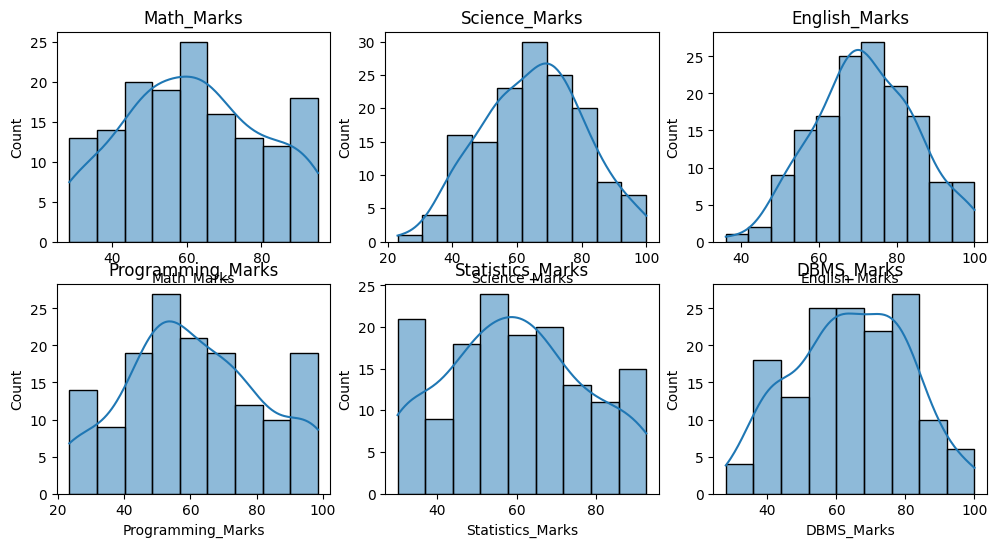

In [231]:
plt.figure(figsize=(12,6))
for i, col in enumerate(subject_cols, 1):
    plt.subplot(2,3,i)
    sns.histplot(df_treated[col], kde=True)
    plt.title(col)

### ❓ Q9. Kurtosis Analysis

**Scenario:** Along with skewness, the professor also wants to check **kurtosis** — whether score distributions are too peaked (leptokurtic) or too flat (platykurtic) compared to a normal distribution.

**Tasks:**
1. Compute kurtosis for all 6 subject columns.
2. Print whether each subject is leptokurtic (>3), platykurtic (<3), or mesokurtic (≈3).

> 🧩 **Hint:** Use `df[col].kurtosis()`. Note: pandas returns excess kurtosis (normal=0), so compare with 0 instead of 3.

In [232]:
# Your code here
# Q9 — Kurtosis

# Compute kurtosis for each subject

# Interpret each


In [233]:
df[col].kurtosis()

np.float64(-0.6630503535967289)

In [234]:
kurt_values = df_treated[subject_cols].kurtosis()
print("Kurtosis Values:\n", kurt_values)


Kurtosis Values:
 Math_Marks          -0.867810
Science_Marks       -0.428691
English_Marks       -0.301892
Programming_Marks   -0.684657
Statistics_Marks    -0.812795
DBMS_Marks          -0.663050
dtype: float64


In [235]:
for col in subject_cols:
    if kurt_values[col] > 0:
        print(col, "→ Leptokurtic (More peaked than normal)")
    elif kurt_values[col] < 0:
        print(col, "→ Platykurtic (Flatter than normal)")
    else:
        print(col, "→ Mesokurtic (Normal-like)")

Math_Marks → Platykurtic (Flatter than normal)
Science_Marks → Platykurtic (Flatter than normal)
English_Marks → Platykurtic (Flatter than normal)
Programming_Marks → Platykurtic (Flatter than normal)
Statistics_Marks → Platykurtic (Flatter than normal)
DBMS_Marks → Platykurtic (Flatter than normal)


---
## ⚙️ SECTION 5: Feature Encoding
---

### ❓ Q10. Label Encoding

**Scenario:** You're preparing the dataset for a **machine learning model**. ML models can't handle text data like 'Male'/'Female' or 'Placed'/'Not Placed'. The junior analyst suggests using **Label Encoding** for binary columns.

**Tasks:**
Label encode: `Gender`, `Part_Time_Job`, `Internship_Done`, `Scholarship`, `Placement_Status`.
Print the unique values before and after encoding.

> 🧩 **Hint:** Use `sklearn.preprocessing.LabelEncoder`. Fit and transform each column. Or use `df['col'].map({'Yes':1,'No':0})`.

In [236]:
# Your code here
# Q10 — Label Encoding

from sklearn.preprocessing import LabelEncoder

df_encoded = df_clean.copy()
le = LabelEncoder()

encode_cols = ['Gender', 'Part_Time_Job', 'Internship_Done', 'Scholarship', 'Placement_Status']

for col in encode_cols:
    # Print before
    # Encode
    pass


In [237]:
# Q10 — Label Encoding

from sklearn.preprocessing import LabelEncoder

df_encoded = df_clean.copy()
le = LabelEncoder()

encode_cols = ['Gender', 'Part_Time_Job', 'Internship_Done',
               'Scholarship', 'Placement_Status']

for col in encode_cols:

    # 1️⃣ Print unique values before encoding
    print(f"\n{col} - Before Encoding:")
    print(df_encoded[col].unique())

    # 2️⃣ Apply Label Encoding
    df_encoded[col] = le.fit_transform(df_encoded[col])

    # 3️⃣ Print unique values after encoding
    print(f"{col} - After Encoding:")
    print(df_encoded[col].unique())


Gender - Before Encoding:
['Male' 'Female' 'Non-Binary']
Gender - After Encoding:
[1 0 2]

Part_Time_Job - Before Encoding:
['No' 'Yes']
Part_Time_Job - After Encoding:
[0 1]

Internship_Done - Before Encoding:
['Yes' 'No']
Internship_Done - After Encoding:
[1 0]

Scholarship - Before Encoding:
['No']
Scholarship - After Encoding:
[0]

Placement_Status - Before Encoding:
[np.str_('Placed') np.str_('Not Placed')]
Placement_Status - After Encoding:
[1 0]


In [238]:
df_encoded['Part_Time_Job'] = df_encoded['Part_Time_Job'].map({'Yes':1, 'No':0})
df_encoded['Internship_Done'] = df_encoded['Internship_Done'].map({'Yes':1, 'No':0})
df_encoded['Part_Time_Job']


,Part_Time_Job
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
145,NaN
146,NaN
147,NaN
148,NaN


In [239]:
df_encoded['Internship_Done']

,Internship_Done
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
145,NaN
146,NaN
147,NaN
148,NaN


### ❓ Q11. One-Hot Encoding

**Scenario:** The ML team specifically asks for **One-Hot Encoding** for the `Department` and `Grade` columns — since these are **nominal/ordinal** categories with more than 2 values and no natural numeric order.

**Tasks:**
1. Apply One-Hot Encoding to `Department` and `Grade`.
2. Show the new columns created.
3. Show the shape before and after.

> 🧩 **Hint:** Use `pd.get_dummies(df, columns=['Department','Grade'], drop_first=True)` or `sklearn`'s `OneHotEncoder`.

In [240]:
# Your code here
# Q11 — One-Hot Encoding

print('Shape before:', df_clean.shape)

# Apply OHE

# Shape after

# Show new columns


Shape before: (150, 26)


In [241]:
print('Shape after:', df_clean.shape)

Shape after: (150, 26)


In [242]:
df_ohe = pd.get_dummies(df_clean,
                        columns=['Department', 'Grade'],
                        drop_first=True)
df_ohe.shape

(150, 31)

In [243]:
drop_first=True
drop_first

True

In [244]:
new_cols = [col for col in df_ohe.columns
            if col not in df_clean.columns]

print("\nNewly Created Columns:")
print(new_cols)


Newly Created Columns:
['Department_Civil', 'Department_Computer Science', 'Department_Data Science', 'Department_Electronics', 'Department_Mechanical', 'Grade_C', 'Grade_D']


### ❓ Q12. Ordinal Encoding for Grade

**Scenario:** A senior data scientist says **grades have an order** (F < D < C < B < A), so One-Hot Encoding loses this information. She insists on **Ordinal Encoding** for the Grade column.

**Tasks:**
Map Grade to numbers: F=0, D=1, C=2, B=3, A=4. Verify the distribution of the encoded column.

> 🧩 **Hint:** Use `df['Grade'].map({'F':0,'D':1,'C':2,'B':3,'A':4})`. Then use `.value_counts()` to verify.

In [245]:
# Your code here
# Q12 — Ordinal Encoding

grade_map = {'F': 0, 'D': 1, 'C': 2, 'B': 3, 'A': 4}

# Apply mapping

# Verify


In [246]:
df['Grade'].map({'F':0,'D':1,'C':2,'B':3,'A':4})

,Grade
0,3
1,2
2,2
3,2
4,2
...,...
145,2
146,1
147,2
148,3


In [247]:
df['Grade'].map({'F':0,'D':1,'C':2,'B':3,'A':4}).value_counts()

,count
Grade,
2,97
3,31
1,22


---
## 📐 SECTION 6: Feature Scaling
---

### ❓ Q13. Min-Max Scaling (Normalization)

**Scenario:** A KNN model will be trained on student data. KNN is **distance-based**, so features like `Total_Marks` (0-600) and `Attendance_%` (0-100) on different scales will cause bias. The team wants to **normalize** all numeric features to [0,1].

**Tasks:**
1. Apply Min-Max scaling to: `Total_Marks`, `Attendance_%`, `Study_Hours_Per_Day`, `Stress_Level`.
2. Print min and max before and after scaling.

> 🧩 **Hint:** Use `sklearn.preprocessing.MinMaxScaler`. Fit on the column and transform. The result should always be between 0 and 1.

In [248]:
# Your code here
# Q13 — Min-Max Scaling

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scale_cols = ['Total_Marks', 'Attendance_%', 'Study_Hours_Per_Day', 'Stress_Level']

df_scaled = df_clean.copy()

# Apply scaling

# Verify min/max


In [249]:
print("Before Scaling:\n")
for col in scale_cols:
    print(f"{col} → Min: {df_scaled[col].min()}, Max: {df_scaled[col].max()}")


Before Scaling:

Total_Marks → Min: 241, Max: 487
Attendance_% → Min: 44.0, Max: 100.0
Study_Hours_Per_Day → Min: 0.0, Max: 10.5
Stress_Level → Min: 1.0, Max: 10.0


In [250]:
print("After Scaling:\n")
for col in scale_cols:
    print(f"{col} → Min: {df_scaled[col].min()}, Max: {df_scaled[col].max()}")

After Scaling:

Total_Marks → Min: 241, Max: 487
Attendance_% → Min: 44.0, Max: 100.0
Study_Hours_Per_Day → Min: 0.0, Max: 10.5
Stress_Level → Min: 1.0, Max: 10.0


In [251]:
df_scaled[scale_cols] = scaler.fit_transform(df_scaled[scale_cols])
df_scaled[scale_cols]

,Total_Marks,Attendance_%,Study_Hours_Per_Day,Stress_Level
0,0.821138,0.750000,0.466667,0.666667
1,0.589431,0.964286,0.304762,0.111111
2,0.621951,0.964286,0.447619,0.777778
3,0.715447,0.750000,0.333333,0.555556
4,0.516260,0.464286,0.342857,0.222222
...,...,...,...,...
145,0.548780,0.732143,0.485714,0.333333
146,0.329268,0.357143,0.504762,0.888889
147,0.670732,1.000000,0.523810,1.000000
148,1.000000,0.928571,0.438095,0.222222


### ❓ Q14. Standard Scaling (Standardization)

**Scenario:** For a **Logistic Regression model** predicting placement, standard scaling (mean=0, std=1) is preferred over Min-Max scaling because it handles outliers better.

**Tasks:**
1. Apply `StandardScaler` to all 6 subject mark columns.
2. Verify that the mean is ~0 and std is ~1 after scaling.

> 🧩 **Hint:** Use `sklearn.preprocessing.StandardScaler`. After scaling, `df[scaled_cols].mean()` should be close to 0 and `df[scaled_cols].std()` close to 1.

In [252]:
# Q14 — Standard Scaling

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

subject_cols = ['Math_Marks', 'Science_Marks', 'English_Marks',
                'Programming_Marks', 'Statistics_Marks', 'DBMS_Marks']

df_std = df_clean.copy()

# Apply StandardScaler
df_std[subject_cols] = ss.fit_transform(df_std[subject_cols])

# Verify Mean (~0)
print("Mean after scaling:")
print(df_std[subject_cols].mean())

# Verify Std (~1)
print("\nStandard Deviation after scaling:")
print(df_std[subject_cols].std())

Mean after scaling:
Math_Marks          -5.921189e-17
Science_Marks        1.065814e-16
English_Marks       -2.990201e-16
Programming_Marks   -4.144833e-17
Statistics_Marks    -1.539509e-16
DBMS_Marks           5.921189e-18
dtype: float64

Standard Deviation after scaling:
Math_Marks           1.00335
Science_Marks        1.00335
English_Marks        1.00335
Programming_Marks    1.00335
Statistics_Marks     1.00335
DBMS_Marks           1.00335
dtype: float64


### ❓ Q15. Robust Scaling

**Scenario:** Since we found outliers in some columns, the data science lead recommends **Robust Scaler** which uses IQR instead of mean/std — making it **resistant to outliers**.

**Tasks:**
Apply `RobustScaler` to `Math_Marks` and compare the distribution before and after using a side-by-side boxplot.

> 🧩 **Hint:** Use `sklearn.preprocessing.RobustScaler`. Plot using `plt.subplot(1,2,1)` before and `plt.subplot(1,2,2)` after.

In [253]:
# Your code here
# Q15 — Robust Scaling

from sklearn.preprocessing import RobustScaler

# Apply Robust Scaler

# Side-by-side boxplot


In [254]:
df_robust = df_clean.copy()

rs = RobustScaler()
df_robust['Math_Marks_Robust'] = rs.fit_transform(
    df_robust[['Math_Marks']]
)

plt.figure(figsize=(10,4))

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

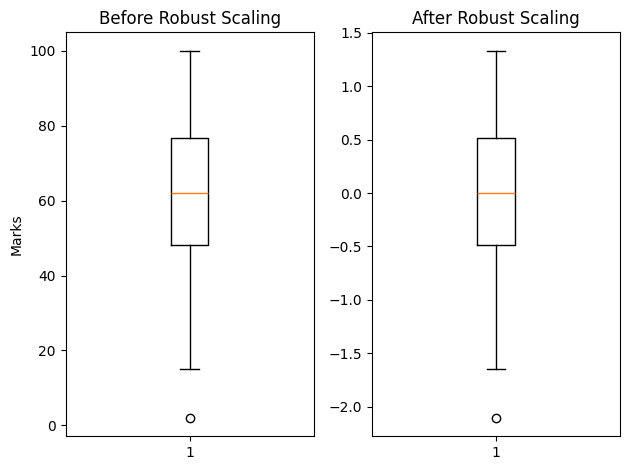

In [255]:
# Before Scaling
plt.subplot(1,2,1)
plt.boxplot(df_clean['Math_Marks'])
plt.title("Before Robust Scaling")
plt.ylabel("Marks")

# After Scaling
plt.subplot(1,2,2)
plt.boxplot(df_robust['Math_Marks_Robust'])
plt.title("After Robust Scaling")

plt.tight_layout()
plt.show()

---
## 🔗 SECTION 7: Correlation & Relationship Analysis
---

### ❓ Q16. Correlation Heatmap

**Scenario:** The research team wants to know — **do students who study more hours score higher?** Does attendance affect total marks? Is stress linked to lower grades? A correlation heatmap will reveal these relationships at a glance.

**Tasks:**
1. Compute the correlation matrix for numeric columns.
2. Plot a heatmap with annotations.
3. Identify the top 3 positive and top 3 negative correlations with `Total_Marks`.

> 🧩 **Hint:** Use `df.corr()` then `sns.heatmap(corr, annot=True, cmap='coolwarm')`. To find correlations with Total_Marks, use `corr['Total_Marks'].sort_values()`.

In [256]:
# Your code here
# Q16 — Correlation Heatmap

# Compute correlation matrix

# Heatmap

# Top correlations with Total_Marks

In [257]:
data = df_clean.copy()

In [258]:
corr = data.corr(numeric_only=True)
corr

,Age,Year_of_Study,Math_Marks,Science_Marks,English_Marks,Programming_Marks,Statistics_Marks,DBMS_Marks,Total_Marks,Percentage,GPA,Attendance_%,Study_Hours_Per_Day,Extracurricular_Hours,Library_Visits_Month,Stress_Level,Z_score
Age,1.000000,0.111450,-0.002232,-0.015241,-0.103249,-0.003820,-0.036567,-0.083581,-0.075561,-0.075609,-0.082802,0.088366,0.047870,0.050111,0.043073,0.038373,-0.075561
Year_of_Study,0.111450,1.000000,-0.027516,-0.059229,-0.157414,-0.020842,-0.116664,-0.052792,-0.161251,-0.161247,-0.108732,-0.152508,0.007262,0.135799,-0.022288,-0.007663,-0.161251
Math_Marks,-0.002232,-0.027516,1.000000,-0.045842,0.040121,0.087941,0.107881,0.040540,0.536567,0.536548,0.559363,-0.029707,-0.106122,0.132485,0.062606,-0.021052,0.536567
Science_Marks,-0.015241,-0.059229,-0.045842,1.000000,-0.078747,0.007694,0.079901,-0.030663,0.310549,0.310517,0.277936,-0.017860,-0.202083,-0.073956,0.101216,0.069084,0.310549
English_Marks,-0.103249,-0.157414,0.040121,-0.078747,1.000000,0.131553,0.122578,0.001467,0.376285,0.376247,0.365030,-0.023617,0.005916,0.019032,-0.043113,-0.143322,0.376285
Programming_Marks,-0.003820,-0.020842,0.087941,0.007694,0.131553,1.000000,0.062738,-0.160585,0.500375,0.500376,0.468494,0.137350,-0.076454,0.022783,0.041214,-0.093306,0.500375
Statistics_Marks,-0.036567,-0.116664,0.107881,0.079901,0.122578,0.062738,1.000000,0.013822,0.548213,0.548232,0.519249,-0.054431,0.014252,-0.043296,0.151596,-0.053069,0.548213
DBMS_Marks,-0.083581,-0.052792,0.040540,-0.030663,0.001467,-0.160585,0.013822,1.000000,0.289277,0.289339,0.292514,0.105255,-0.087450,-0.016254,0.023294,-0.156134,0.289277
Total_Marks,-0.075561,-0.161251,0.536567,0.310549,0.376285,0.500375,0.548213,0.289277,1.000000,1.000000,0.970639,0.061744,-0.171600,0.030201,0.142882,-0.137363,1.000000
Percentage,-0.075609,-0.161247,0.536548,0.310517,0.376247,0.500376,0.548232,0.289339,1.000000,1.000000,0.970652,0.061763,-0.171614,0.030197,0.142904,-0.137374,1.000000


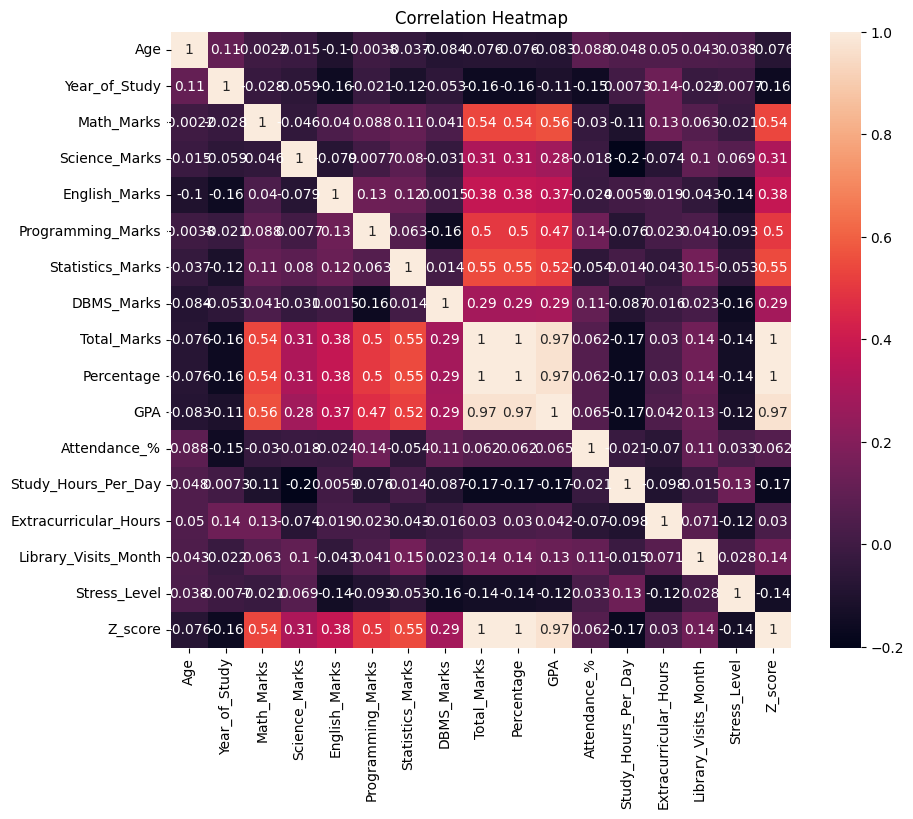

In [259]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [260]:
total_corr = corr['Total_Marks'].sort_values()

In [261]:
# Top 3 Negative
print("Top 3 Negative Correlations with Total_Marks:")
print(total_corr.head(3))

Top 3 Negative Correlations with Total_Marks:
Study_Hours_Per_Day   -0.171600
Year_of_Study         -0.161251
Stress_Level          -0.137363
Name: Total_Marks, dtype: float64


In [262]:
# Top 3 Positive (excluding self-correlation)
print("\nTop 3 Positive Correlations with Total_Marks:")
print(total_corr.tail(4).iloc[:-1])


Top 3 Positive Correlations with Total_Marks:
GPA            0.970639
Percentage     1.000000
Total_Marks    1.000000
Name: Total_Marks, dtype: float64


### ❓ Q17. Scatter Plot — Study Hours vs Total Marks

**Scenario:** Parents and professors often debate — **"Does more study time always mean better grades?"** The academic board wants you to visualize this relationship using a scatter plot, colored by placement status.

**Tasks:**
Create a scatter plot of `Study_Hours_Per_Day` vs `Total_Marks`, colored by `Placement_Status`. Add a trend line.

> 🧩 **Hint:** Use `sns.scatterplot(x='Study_Hours_Per_Day', y='Total_Marks', hue='Placement_Status', data=df)`. Add trend line with `sns.regplot()`.

In [263]:
# Your code here
# Q17 — Scatter Plot


<Axes: xlabel='Study_Hours_Per_Day', ylabel='Total_Marks'>

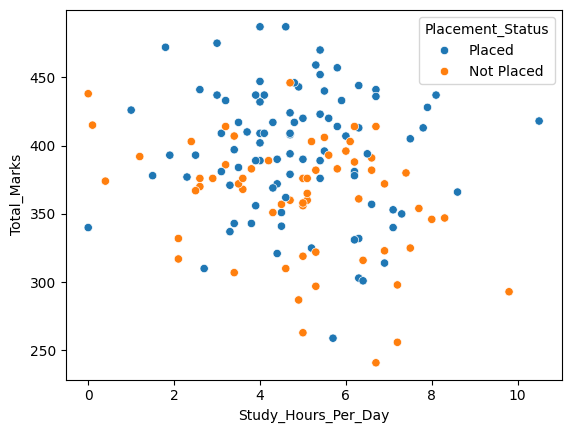

In [264]:
sns.scatterplot(x='Study_Hours_Per_Day', y='Total_Marks', hue='Placement_Status', data=df)

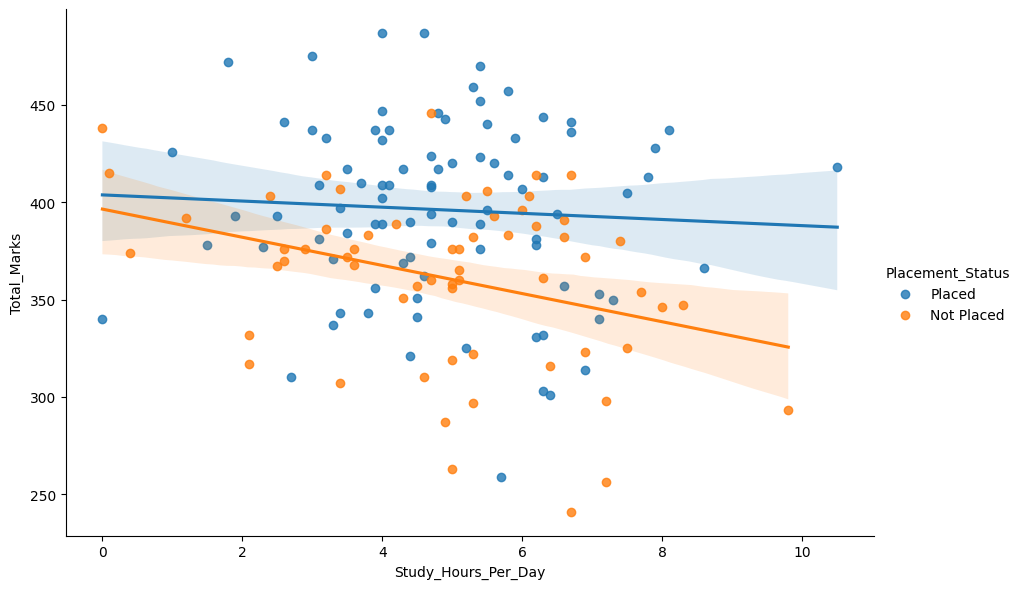

In [265]:
sns.lmplot(x='Study_Hours_Per_Day', y='Total_Marks', hue='Placement_Status', data=df, aspect=1.5, height=6)

---
## 🏫 SECTION 8: Grouping & Aggregation
---

### ❓ Q18. Department-wise Performance

**Scenario:** The academic committee is reviewing which **department performs the best and worst**. They want average total marks and average GPA for each department, sorted from best to worst.

**Tasks:**
1. Group by `Department` and compute mean of `Total_Marks` and `GPA`.
2. Sort by `Total_Marks` descending.
3. Plot a bar chart.

> 🧩 **Hint:** Use `df.groupby('Department')[['Total_Marks','GPA']].mean()`. Sort with `.sort_values()`. Plot with `.plot(kind='bar')`.

In [266]:
# Your code here
# Q18 — Department-wise Performance


In [267]:
df.groupby('Department')[['Total_Marks','GPA']].mean()

,Total_Marks,GPA
Department,,
Business Analytics,363.708333,2.441818
Civil,379.093750,2.499000
Computer Science,403.375000,2.680870
Data Science,371.181818,2.474545
Electronics,399.600000,2.666667
Mechanical,373.521739,2.506667


In [268]:
df.groupby('Department')[['Total_Marks','GPA']].mean().sort_values('Total_Marks')

,Total_Marks,GPA
Department,,
Business Analytics,363.708333,2.441818
Data Science,371.181818,2.474545
Mechanical,373.521739,2.506667
Civil,379.093750,2.499000
Electronics,399.600000,2.666667
Computer Science,403.375000,2.680870


<Axes: xlabel='Department'>

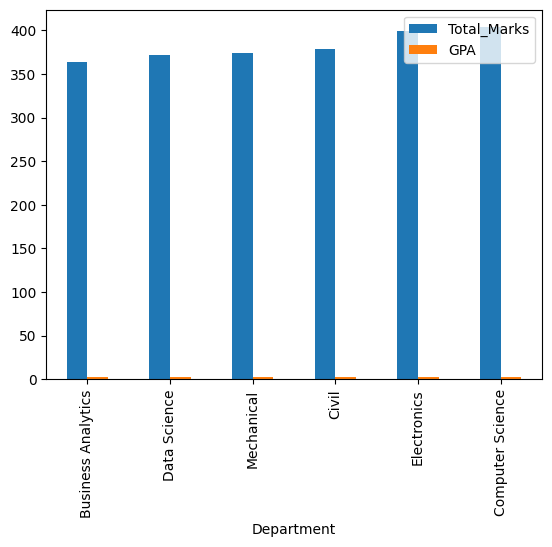

In [269]:
df.groupby('Department')[['Total_Marks','GPA']].mean().sort_values('Total_Marks').plot(kind='bar')

### ❓ Q19. Grade Distribution & Placement Rate

**Scenario:** The placement officer wants to know — **what percentage of students in each grade category got placed?** She suspects Grade A students have near 100% placement but is not sure about Grade C and D.

**Tasks:**
1. Count students per grade.
2. Compute placement rate (%) per grade.
3. Visualize both in a grouped chart.

> 🧩 **Hint:** Use `pd.crosstab(df['Grade'], df['Placement_Status'])` then normalize by row. Multiply by 100 for percentage.

In [270]:
# Your code here
# Q19 — Grade Distribution & Placement Rate


In [271]:
pd.crosstab(df['Grade'], df['Placement_Status'])

Placement_Status,Not Placed,Placed
Grade,,
B,2,29
C,44,53
D,15,7


In [272]:
pd.crosstab(df['Grade'], df['Placement_Status'])*100

Placement_Status,Not Placed,Placed
Grade,,
B,200,2900
C,4400,5300
D,1500,700


### ❓ Q20. Year-wise Attendance and Stress

**Scenario:** A counselor noticed that **final-year students seem more stressed** and **junior students have lower attendance** (possibly due to adjustment challenges). Verify this hypothesis using data.

**Tasks:**
1. Group by `Year_of_Study` and compute mean `Attendance_%` and `Stress_Level`.
2. Plot a line chart showing both metrics across years.

> 🧩 **Hint:** Use `df.groupby('Year_of_Study')[['Attendance_%','Stress_Level']].mean()`. Line plot with `.plot(marker='o')`.

In [273]:
# Your code here
# Q20 — Year-wise Attendance and Stress


In [274]:
df.groupby('Year_of_Study')[['Attendance_%','Stress_Level']].mean()

,Attendance_%,Stress_Level
Year_of_Study,,
1,81.181818,5.416667
2,77.909091,5.431818
3,77.215686,5.509434
4,74.000000,5.323529


<Axes: xlabel='Year_of_Study'>

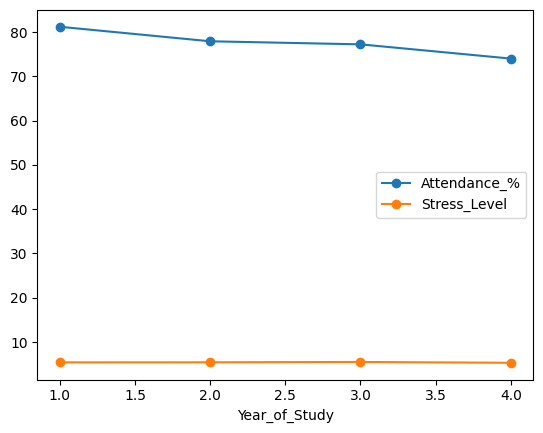

In [275]:
df.groupby('Year_of_Study')[['Attendance_%','Stress_Level']].mean().plot(marker='o')

---
## 🎯 SECTION 9: Advanced Analysis
---

### ❓ Q21. Identify Failing Students

**Scenario:** The registrar's office needs a list of all students with Grade **'F'** — these students are at risk of not graduating. The list should include their name, department, year, and total marks for counseling purposes.

**Tasks:**
1. Filter students with Grade 'F'.
2. Display their Student_ID, Name, Department, Year_of_Study, Total_Marks.
3. What percentage of total students are failing?

> 🧩 **Hint:** Use `df[df['Grade'] == 'F']` to filter. For percentage, divide by total count and multiply by 100.

In [276]:
# Your code here
# Q21 — Failing Students

In [277]:
failing_students = df[df['Grade'] == 'F']
print("Students with Grade 'F':")
print(failing_students[['Student_ID', 'Name', 'Department', 'Year_of_Study', 'Total_Marks']])

Students with Grade 'F':
Empty DataFrame
Columns: [Student_ID, Name, Department, Year_of_Study, Total_Marks]
Index: []


### ❓ Q22. Top 10 Performers

**Scenario:** Scholarship announcements are coming up! The scholarship committee wants the **top 10 students by Percentage**. In case of a tie, the student with higher Attendance gets priority.

**Tasks:**
1. Sort the DataFrame by `Percentage` descending, then `Attendance_%` descending.
2. Display the top 10 with relevant columns.

> 🧩 **Hint:** Use `df.sort_values(by=['Percentage','Attendance_%'], ascending=[False, False]).head(10)`.

In [278]:
# Your code here
# Q22 — Top 10 Performers
df.sort_values(by=['Percentage','Attendance_%'], ascending=[False, False]).head(10)

,Student_ID,Name,Age,Gender,Department,Year_of_Study,Math_Marks,Science_Marks,English_Marks,Programming_Marks,...,Attendance_%,Study_Hours_Per_Day,Extracurricular_Hours,Library_Visits_Month,Stress_Level,Part_Time_Job,Internship_Done,Scholarship,Placement_Status,Z_score
148,STU149,Meera Patel,23,Male,Civil,2,50,98,94,99.0,...,96.0,4.6,1,19,3.0,No,Yes,No,Placed,2.195986
46,STU047,Nisha Iyer,19,Male,Electronics,3,97,76,84,100.0,...,62.0,4.0,14,11,3.0,Yes,No,No,Placed,2.195986
121,STU122,Neha Patel,23,Male,Computer Science,3,78,84,71,90.0,...,92.0,3.0,2,19,1.0,No,Yes,No,Placed,1.945207
14,STU015,Raj Gupta,24,Female,Electronics,4,93,68,76,94.0,...,72.0,1.8,14,13,3.0,No,No,No,Placed,1.882512
29,STU030,Harsh Nair,24,Male,Mechanical,2,84,68,75,64.0,...,100.0,5.4,4,16,6.0,No,Yes,No,Placed,1.840716
53,STU054,Arjun Chandra,18,Male,Computer Science,2,86,69,70,98.0,...,78.0,5.3,13,12,9.0,Yes,No,No,Placed,1.610835
66,STU067,Tanya Singh,22,Male,Electronics,2,77,78,71,63.0,...,NaN,5.8,10,15,10.0,No,Yes,No,Placed,1.569039
32,STU033,Raj Rao,22,Male,Civil,3,91,84,66,50.0,...,75.0,5.4,3,4,2.0,No,No,No,Placed,1.464548
90,STU091,Divya Singh,19,Male,Electronics,2,63,90,78,52.0,...,51.0,4.0,2,6,3.0,No,Yes,No,Placed,1.360057
67,STU068,Amit Pillai,22,Male,Civil,3,60,81,85,94.0,...,74.0,4.8,1,9,4.0,No,No,No,Placed,1.339158


### ❓ Q23. Feature Engineering — Create Performance Category

**Scenario:** The analytics team wants a new column called `Performance_Category` that combines grade and attendance:
- **'Star'**: Grade A or B **AND** Attendance ≥ 80%
- **'Average'**: Grade C **OR** Attendance between 60-79%
- **'At Risk'**: Grade D or F **OR** Attendance < 60%

**Tasks:**
Create this column using a custom function and show the value counts with a pie chart.

> 🧩 **Hint:** Use `df.apply(lambda row: your_function(row), axis=1)`. Define conditions using `row['Grade']` and `row['Attendance_%']`.

Performance Category Value Counts:
Performance_Category
Average    114
At Risk     28
Star         8
Name: count, dtype: int64


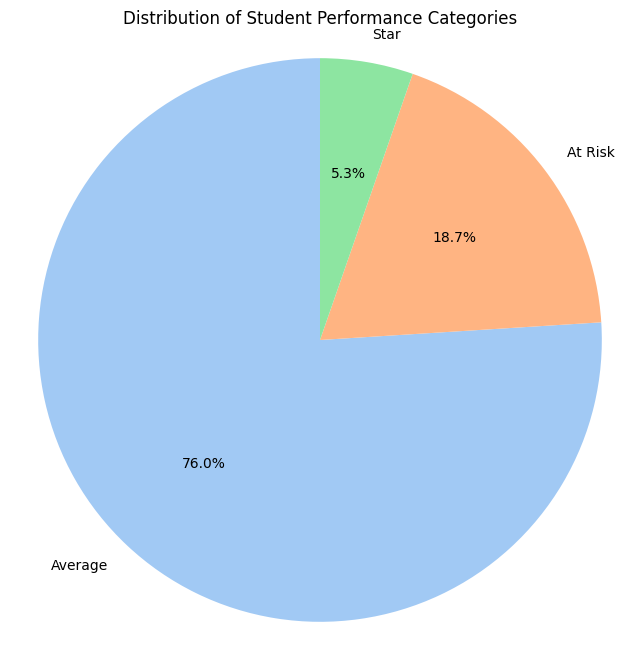

In [279]:
# Your code here
# Q23 — Feature Engineering: Performance Category

import matplotlib.pyplot as plt
import seaborn as sns

def categorize_performance(row):
    grade = row['Grade']
    attendance = row['Attendance_%']

    if (grade in ['A', 'B']) and (attendance >= 80):
        return 'Star'
    elif (grade in ['D', 'F']) or (attendance < 60):
        return 'At Risk'
    else:
        # Remaining cases fall into 'Average'
        # This includes Grade C, or Grade A/B with <80% attendance,
        # or Grade D/F with >=60% attendance (which would be 'At Risk' already if not caught above)
        return 'Average'

# Apply function to create the new column
df_clean['Performance_Category'] = df_clean.apply(categorize_performance, axis=1)

# Value counts
performance_counts = df_clean['Performance_Category'].value_counts()
print("Performance Category Value Counts:")
print(performance_counts)

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(performance_counts, labels=performance_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of Student Performance Categories')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### ❓ Q24. Does Internship Help in Placement?

**Scenario:** The training & placement cell conducted a survey — they believe students who did an **internship are 2x more likely to get placed**. Validate or refute this claim using the data.

**Tasks:**
1. Compute placement rate for students with and without internship.
2. Visualize using a grouped bar chart.
3. State your finding in a comment.

> 🧩 **Hint:** Use `pd.crosstab(df['Internship_Done'], df['Placement_Status'], normalize='index') * 100`.

Placement Rate by Internship Status:
Placement_Status  Not Placed     Placed
Internship_Done                        
No                 36.470588  63.529412
Yes                46.153846  53.846154


<Figure size 800x500 with 0 Axes>

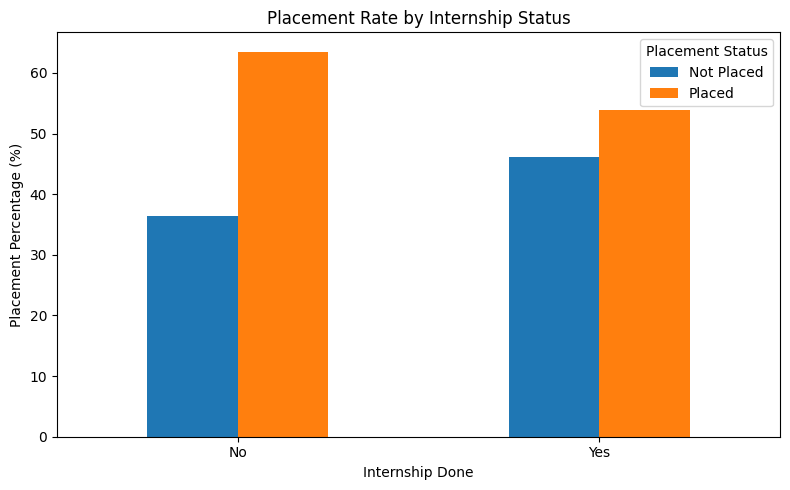

In [280]:
# Your code here
# Q24 — Internship vs Placement

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Compute placement rate for students with and without internship.
placement_rate_by_internship = pd.crosstab(df['Internship_Done'], df['Placement_Status'], normalize='index') * 100
print("Placement Rate by Internship Status:")
print(placement_rate_by_internship)

# 2. Visualize using a grouped bar chart.
plt.figure(figsize=(8, 5))
placement_rate_by_internship.plot(kind='bar', figsize=(8, 5))
plt.title('Placement Rate by Internship Status')
plt.ylabel('Placement Percentage (%)')
plt.xlabel('Internship Done')
plt.xticks(rotation=0)
plt.legend(title='Placement Status')
plt.tight_layout()
plt.show()

# 3. State your finding in a comment.
# Finding: The claim that students who did an internship are 2x more likely to get placed is refuted by this dataset.
# In this data, students who did NOT do an internship have a higher placement rate (~63.5%)
# compared to those who DID do an internship (~53.8%).

In [281]:
pd.crosstab(df['Internship_Done'], df['Placement_Status'], normalize='index') * 100

Placement_Status,Not Placed,Placed
Internship_Done,,
No,36.470588,63.529412
Yes,46.153846,53.846154


### ❓ Q25. Pivot Table — Department × Year Performance

**Scenario:** The academic board wants a **matrix view** of average total marks broken down by **Department (rows)** and **Year of Study (columns)**. This will help identify if any specific department in a specific year is underperforming.

**Tasks:**
1. Create a pivot table with `Department` as rows, `Year_of_Study` as columns, and `Total_Marks` as values (mean).
2. Visualize using a heatmap.

> 🧩 **Hint:** Use `pd.pivot_table(df, index='Department', columns='Year_of_Study', values='Total_Marks', aggfunc='mean')`. Then use `sns.heatmap()` on the result.

Pivot Table (Average Total Marks by Department and Year of Study):
Year_of_Study                1           2           3           4
Department                                                        
Business Analytics  376.000000  400.500000  358.090909  335.166667
Civil               405.666667  381.375000  373.142857  377.000000
Computer Science    411.666667  401.666667  421.500000  389.666667
Data Science        385.333333  366.600000  376.166667  362.333333
Electronics         351.000000  392.700000  407.666667  408.600000
Mechanical          433.000000  399.166667  369.818182  339.000000


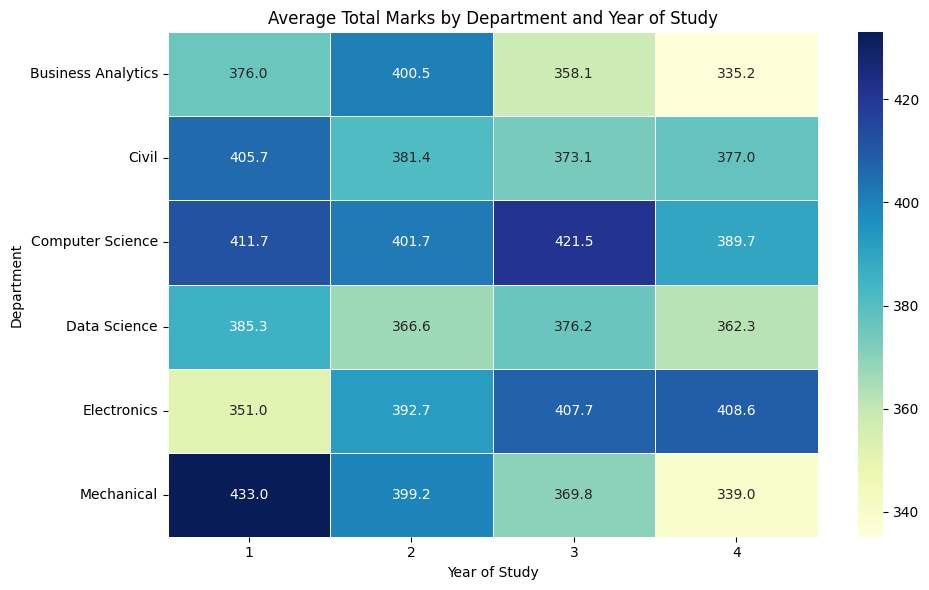

In [282]:
# Your code here
# Q25 — Pivot Table

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Create a pivot table with Department as rows, Year_of_Study as columns, and Total_Marks as values (mean).
pivot_table = df.pivot_table(index='Department', columns='Year_of_Study', values='Total_Marks', aggfunc='mean')
print("Pivot Table (Average Total Marks by Department and Year of Study):")
print(pivot_table)

# 2. Visualize using a heatmap.
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5)
plt.title('Average Total Marks by Department and Year of Study')
plt.xlabel('Year of Study')
plt.ylabel('Department')
plt.tight_layout()
plt.show()

---
## 🚀 BONUS SECTION: Extra Credit
---

### ⭐ BONUS Q1. Log Transformation for Skewed Data

**Scenario:** Library visits (`Library_Visits_Month`) data is **right-skewed** — most students visit rarely but a few visit very frequently. Apply log transformation to normalize the distribution.

**Tasks:**
1. Plot the original distribution.
2. Apply `np.log1p()` transformation.
3. Plot the transformed distribution and compare skewness.

> 🧩 **Hint:** `np.log1p(x)` = log(1+x) — avoids log(0) errors. Compare skewness before and after with `.skew()`.

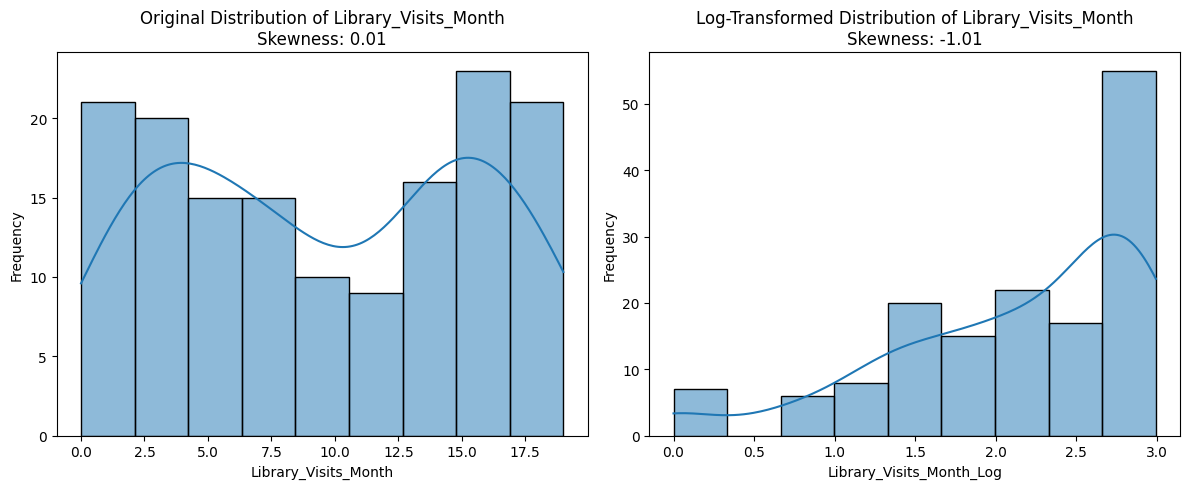

In [283]:
# BONUS Q1 — Log Transformation

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Original column
column_name = 'Library_Visits_Month'

# 1. Plot the original distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_clean[column_name], kde=True)
plt.title(f'Original Distribution of {column_name}\nSkewness: {df_clean[column_name].skew():.2f}')
plt.xlabel(column_name)
plt.ylabel('Frequency')

# 2. Apply np.log1p() transformation
df_clean[f'{column_name}_Log'] = np.log1p(df_clean[column_name])

# 3. Plot the transformed distribution and compare skewness
plt.subplot(1, 2, 2)
sns.histplot(df_clean[f'{column_name}_Log'], kde=True)
plt.title(f'Log-Transformed Distribution of {column_name}\nSkewness: {df_clean[f'{column_name}_Log'].skew():.2f}')
plt.xlabel(f'{column_name}_Log')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### ⭐ BONUS Q2. Binning — Age Groups

**Scenario:** For a demographic report, the admin team wants to group students into **age bands**: 18-19 (Freshers), 20-21 (Sophomore), 22+ (Senior). Create this categorical column.

> 🧩 **Hint:** Use `pd.cut(df['Age'], bins=[17,19,21,25], labels=['Fresher','Sophomore','Senior'])`.

In [284]:
# BONUS Q2 — Age Binning
import matplotlib.pyplot as plt
import seaborn as sns

df_clean['Age_Group'] = pd.cut(df_clean['Age'], bins=[17, 19, 21, 25], labels=['Fresher', 'Sophomore', 'Senior'])
print("Age Group Value Counts:")
print(df_clean['Age_Group'].value_counts())

Age Group Value Counts:
Age_Group
Senior       69
Sophomore    43
Fresher      38
Name: count, dtype: int64


In [285]:
df_clean['Age_Group'] = pd.cut(df_clean['Age'], bins=[17, 19, 21, 25], labels=['Fresher', 'Sophomore', 'Senior'])
df_clean.head()

,Student_ID,Name,Age,Gender,Department,Year_of_Study,Math_Marks,Science_Marks,English_Marks,Programming_Marks,...,Library_Visits_Month,Stress_Level,Part_Time_Job,Internship_Done,Scholarship,Placement_Status,Z_score,Performance_Category,Library_Visits_Month_Log,Age_Group
0,STU001,Dev Kumar,22,Male,Civil,1,87,82,83,62.0,...,3,7.0,No,Yes,No,Placed,1.276464,Star,1.386294,Senior
1,STU002,Aarav Joshi,20,Male,Business Analytics,3,49,64,65,94.0,...,9,2.0,No,No,No,Not Placed,0.085265,Average,2.302585,Sophomore
2,STU003,Divya Mehta,20,Female,Mechanical,3,59,67,50,80.0,...,19,8.0,Yes,No,No,Placed,0.252451,Average,2.995732,Sophomore
3,STU004,Kiran Kumar,18,Female,Business Analytics,2,51,78,78,56.0,...,14,6.0,Yes,Yes,No,Placed,0.733110,Average,2.708050,Fresher
4,STU005,Nisha Singh,21,Male,Business Analytics,4,56,64,72,38.0,...,17,3.0,Yes,Yes,No,Not Placed,-0.290903,Average,2.890372,Sophomore


### ⭐ BONUS Q3. Pair Plot

**Scenario:** As a final exploratory step, the data science lead wants a **pair plot** showing relationships between all numeric performance features, colored by `Grade`. This gives a holistic view for feature selection.

> 🧩 **Hint:** Use `sns.pairplot(df[cols + ['Grade']], hue='Grade', diag_kind='kde')`. Use only 4-5 columns to keep it readable.

In [286]:
# BONUS Q3 — Pair Plot

pair_cols = ['Math_Marks', 'Programming_Marks', 'Total_Marks', 'Study_Hours_Per_Day', 'Grade']

# Pair plot


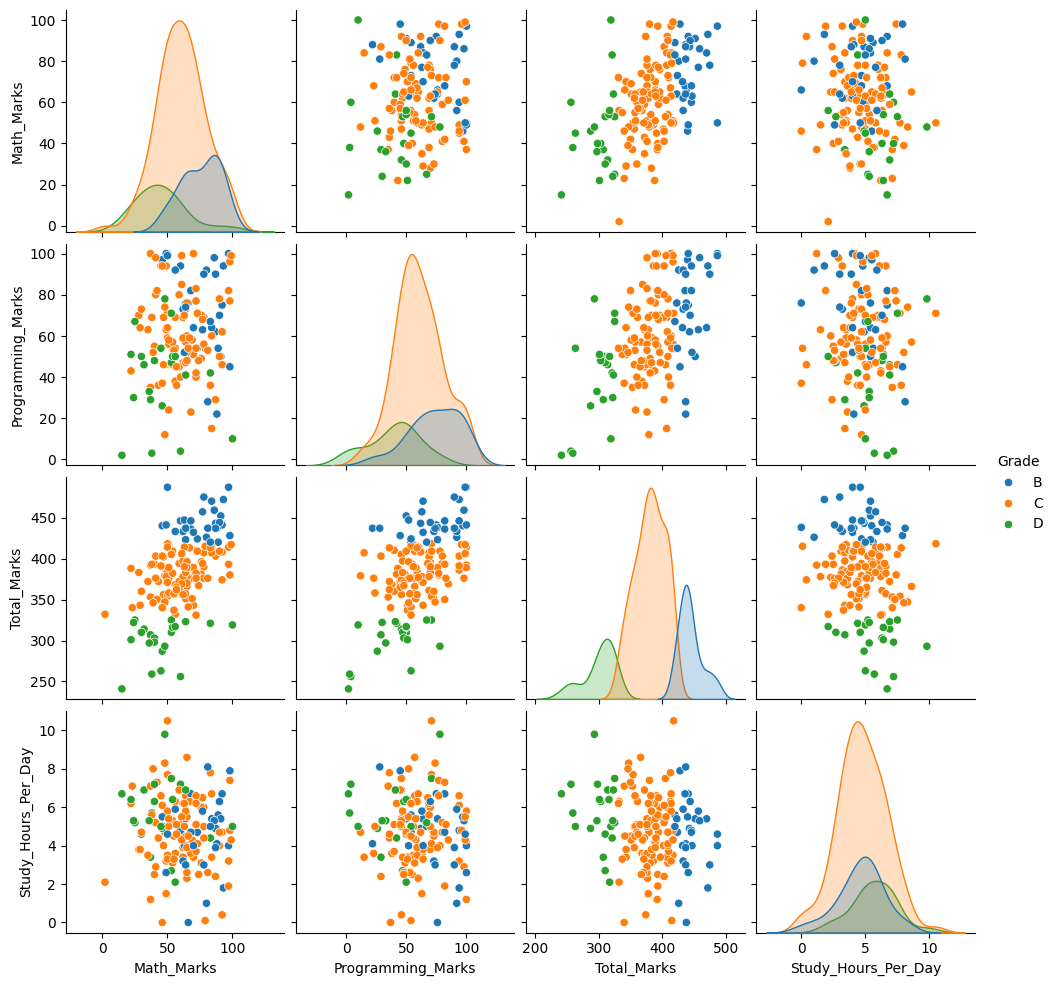

In [287]:
sns.pairplot(df[pair_cols], hue='Grade', diag_kind='kde')

---
##  Assessment Summary

| Section | Topics Covered |
|---------|----------------|
| 1 | Basic Exploration, `.describe()`, `.dtypes` |
| 2 | Missing Value Detection & Imputation |
| 3 | Outlier Detection (IQR, Z-Score, Winsorization) |
| 4 | Skewness, Kurtosis, Distribution Analysis |
| 5 | Label, One-Hot, Ordinal Encoding |
| 6 | Min-Max, Standard, Robust Scaling |
| 7 | Correlation, Scatter Plots |
| 8 | GroupBy, Aggregation, Pivot Tables |
| 9 | Filtering, Feature Engineering, Cross-tabulation |
| Bonus | Log Transform, Binning, Pair Plot |

---
**Good luck! **

*Ramesh University — Data Analytics Lab, 2025*